<a href="https://colab.research.google.com/github/Anshad-Aziz/technical-training/blob/main/Blood_Transfusion_Service_Center_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd


In [13]:
df=pd.read_csv('Blood Transfusion Service data.csv')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   id             748 non-null    int64
 1   Recency        748 non-null    int64
 2   Frequency      748 non-null    int64
 3   Monetary       748 non-null    int64
 4   Time           748 non-null    int64
 5   Class(Target)  748 non-null    int64
dtypes: int64(6)
memory usage: 35.2 KB


In [15]:
df.describe()

,id,Recency,Frequency,Monetary,Time,Class(Target)
count,748.00000,748.000000,748.000000,748.000000,748.000000,748.000000
mean,374.50000,9.506684,5.514706,1378.676471,34.282086,1.237968
std,216.07329,8.095396,5.839307,1459.826781,24.376714,0.426124
min,1.00000,0.000000,1.000000,250.000000,2.000000,1.000000
25%,187.75000,2.750000,2.000000,500.000000,16.000000,1.000000
50%,374.50000,7.000000,4.000000,1000.000000,28.000000,1.000000
75%,561.25000,14.000000,7.000000,1750.000000,50.000000,1.000000
max,748.00000,74.000000,50.000000,12500.000000,98.000000,2.000000


In [16]:
df.head(10)

,id,Recency,Frequency,Monetary,Time,Class(Target)
0,1,2,50,12500,98,2
1,2,0,13,3250,28,2
2,3,1,16,4000,35,2
3,4,2,20,5000,45,2
4,5,1,24,6000,77,1
5,6,4,4,1000,4,1
6,7,2,7,1750,14,2
7,8,1,12,3000,35,1
8,9,2,9,2250,22,2
9,10,5,46,11500,98,2


In [17]:
for i in df.columns:
  dis=len(df[i].unique())
  print(f"{i}-{dis}")

id-748
Recency-31
Frequency-33
Monetary-33
Time-78
Class(Target)-2


In [18]:
df.rename(columns = {'Class(Target)':'class'}, inplace = True)
df.drop(['id'],axis=1,inplace=True)

In [19]:
df['class'].value_counts()

1    570
2    178
Name: class, dtype: int64

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

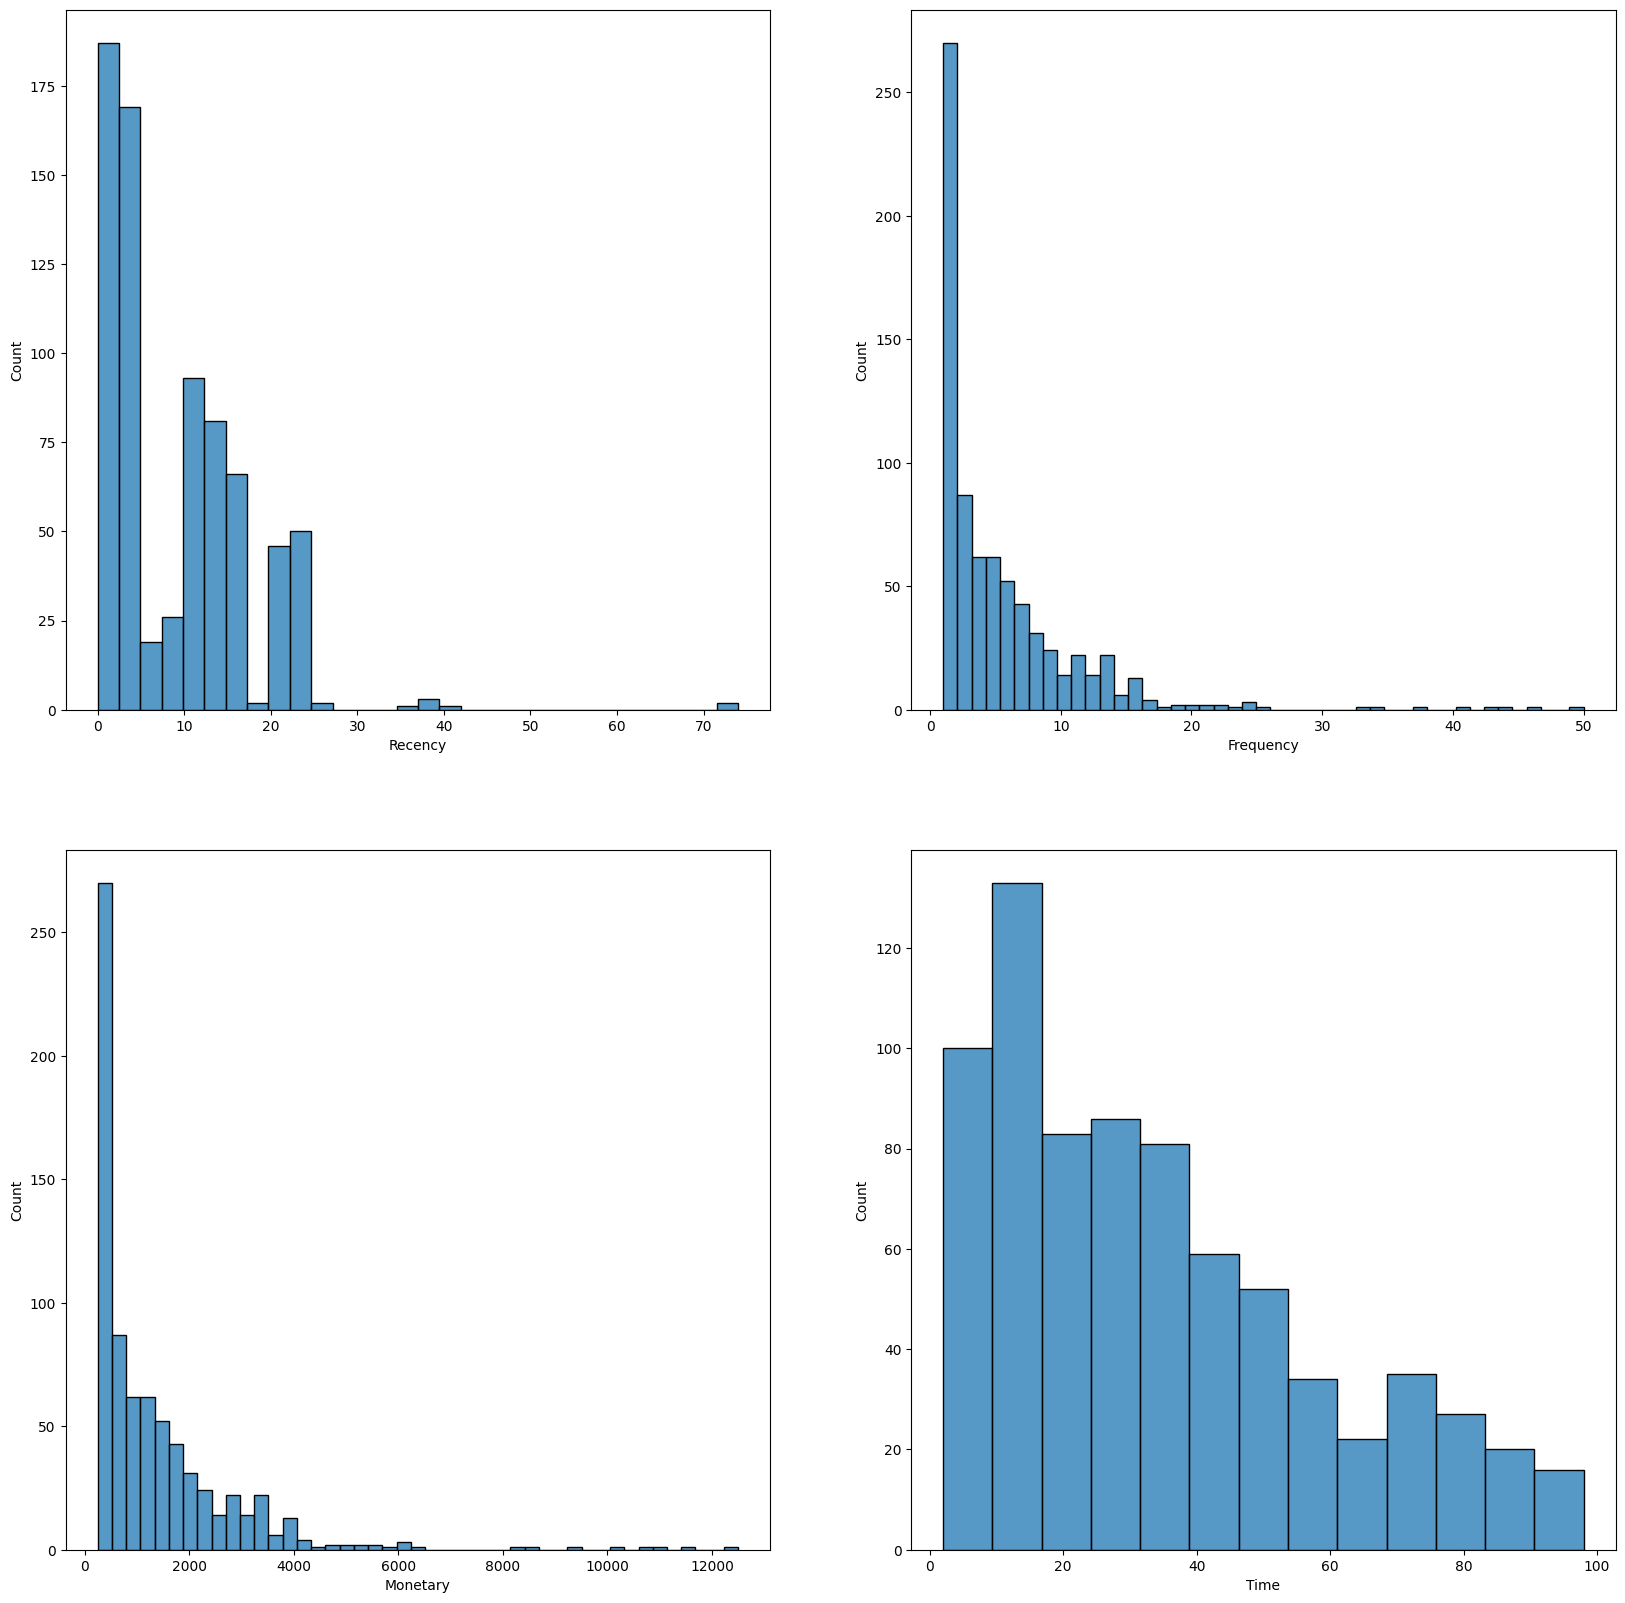

In [25]:
fig,axes=plt.subplots(nrows=2,ncols=2)
axes=axes.flatten()
fig.set_size_inches(20,20)

for ax,col in zip(axes,df.columns):
   sns.histplot(df[col],ax=ax)

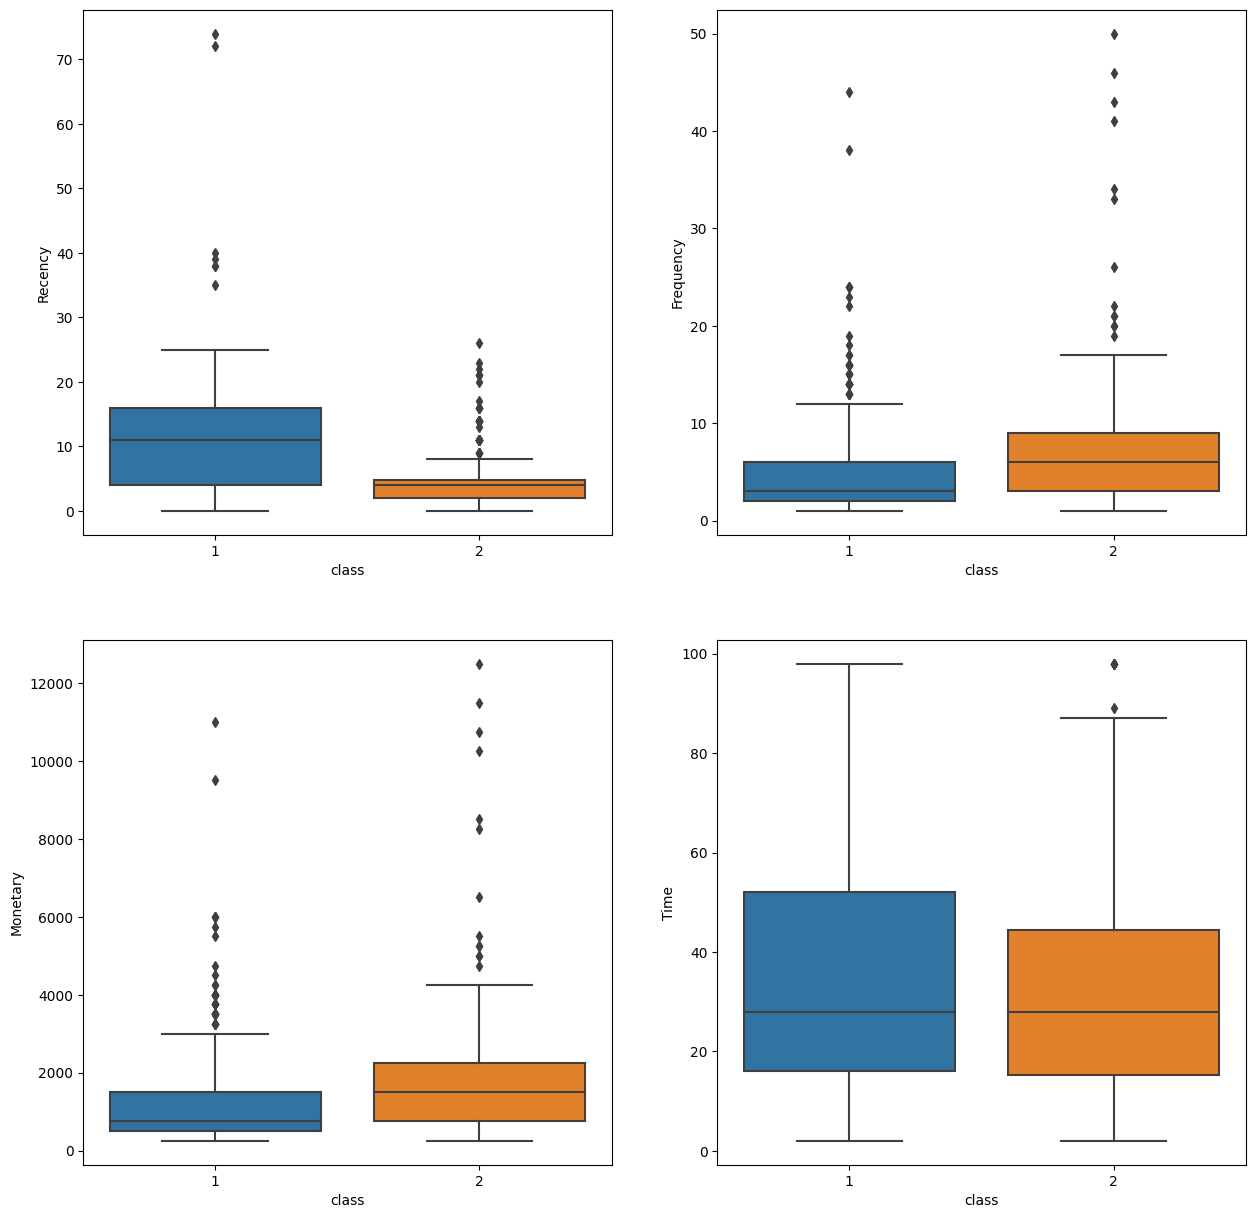

In [27]:
fig,axes=plt.subplots(nrows=2,ncols=2)
axes=axes.flatten()
fig.set_size_inches(15,15)

for ax,col in zip (axes,df.columns):
  sns.boxplot(x='class',y=df[col],ax=ax,data=df)

<Axes: xlabel='Recency', ylabel='Frequency'>

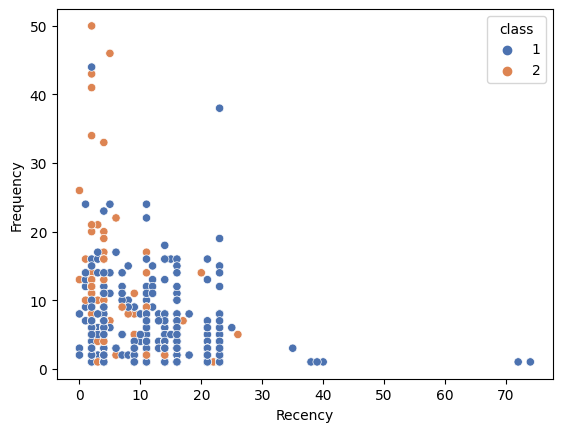

In [28]:
sns.scatterplot(x='Recency',y='Frequency',hue='class',data=df,palette='deep')

<Axes: xlabel='Recency', ylabel='Monetary'>

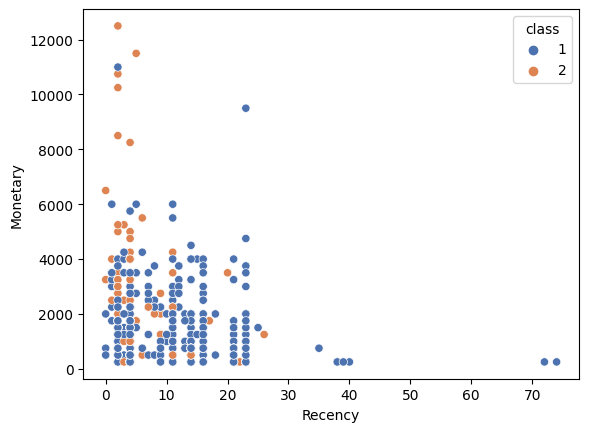

In [29]:
sns.scatterplot(x='Recency',y='Monetary',hue='class',data=df,palette='deep')

<Axes: xlabel='Time', ylabel='Monetary'>

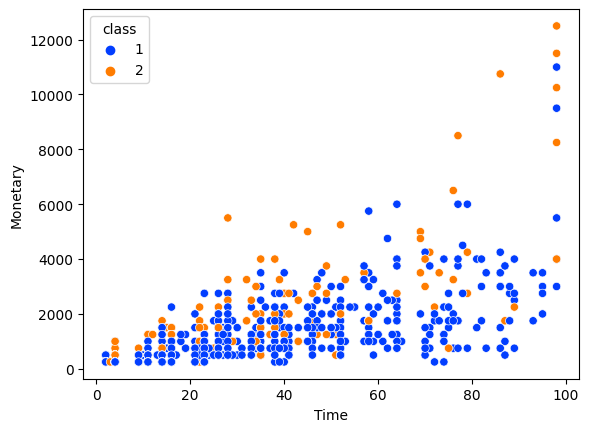

In [31]:
sns.scatterplot(x='Time',y='Monetary',hue='class',data=df,palette='bright')

<Axes: xlabel='Frequency', ylabel='Monetary'>

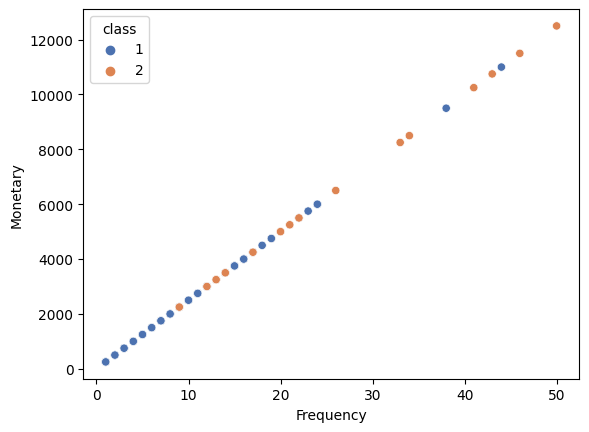

In [32]:
sns.scatterplot(x='Frequency',y='Monetary',hue='class',data=df,palette='deep')

<Axes: >

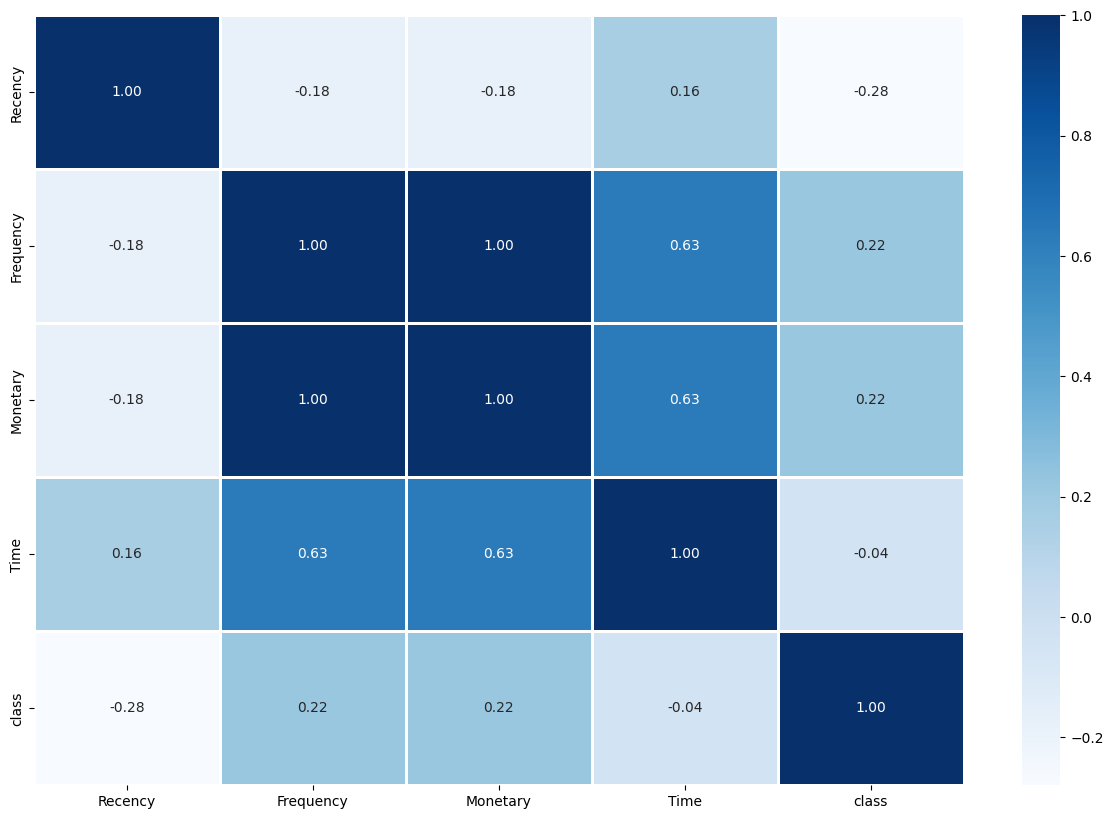

In [33]:
correlation_matrix=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix,annot=True,cmap='Blues',linewidths=1,fmt='.2f')

In [35]:
df.drop(['Monetary'],axis=1,inplace=True)

In [36]:
df.head(10)

,Recency,Frequency,Time,class
0,2,50,98,2
1,0,13,28,2
2,1,16,35,2
3,2,20,45,2
4,1,24,77,1
5,4,4,4,1
6,2,7,14,2
7,1,12,35,1
8,2,9,22,2
9,5,46,98,2


<Axes: >

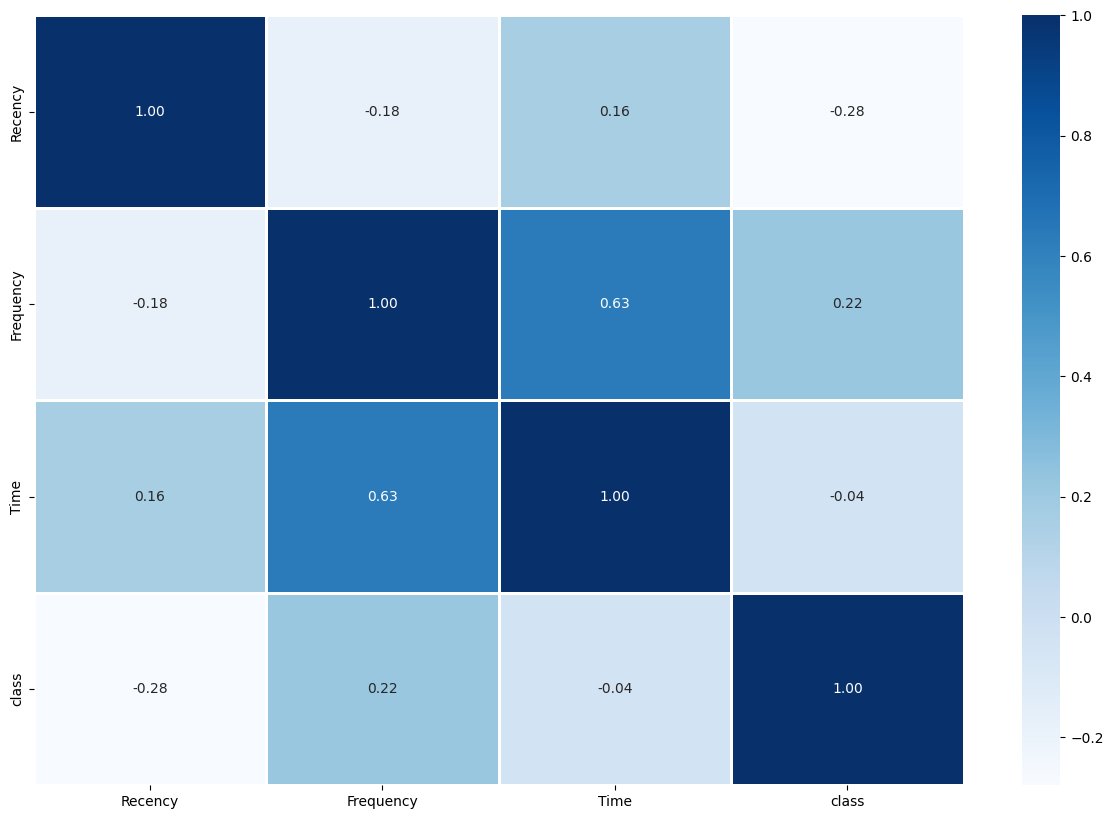

In [37]:
correlation_matrix=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix,annot=True,cmap='Blues',linewidths=1,fmt='.2f')

In [38]:
X=df.drop(['class'],axis=1)
y=df['class']

In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [40]:
X=scaler.fit_transform(X)

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y)

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid={
    'n_estimators':[50,100,150],
    'max_depth':[None,10,20],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
}

In [44]:
rfc=RandomForestClassifier()
rf_Grid=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=3,verbose=0,n_jobs=-1,return_train_score=False)

In [45]:
rf_Grid.fit(X_train,y_train)
rf_Grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 150}

In [46]:
rf=RandomForestClassifier(**rf_Grid.best_params_)

In [47]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=150)

In [48]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
import sklearn.metrics as metrics
y_pred1=rf.predict(X_test)
score_rf=accuracy_score(y_test,y_pred1)
score_rf



0.7688888888888888

In [50]:
f1_rf=f1_score(y_pred1,y_test)
f1_rf

0.858695652173913

In [51]:
cm=metrics.confusion_matrix(y_test,y_pred1)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           1       0.80      0.92      0.86       171
           2       0.54      0.28      0.37        54

    accuracy                           0.77       225
   macro avg       0.67      0.60      0.61       225
weighted avg       0.74      0.77      0.74       225



Text(50.722222222222214, 0.5, 'True')

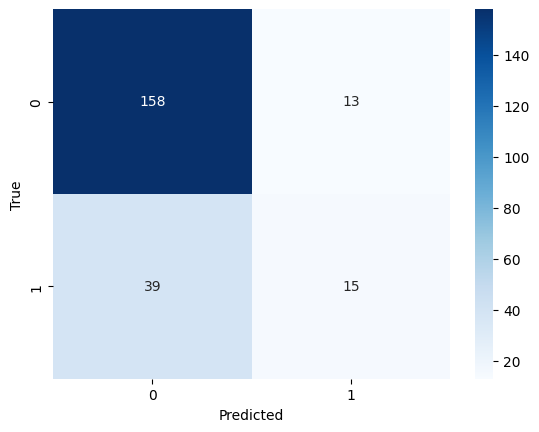

In [52]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
lgr=LogisticRegression()

In [55]:
param_grid={
    'penalty':['l1','l2'],
    'solver':['lbfgs','liblinear','newton-cg','newton-cholesky'],
    'max_iter':[1000,1500,2000],
     'multi_class':['auto','ovr','multinomial'],
    'class_weight':['dict','balanced']
}

In [57]:
lgr_grid=GridSearchCV(estimator=lgr,param_grid=param_grid,cv=3,verbose=0,n_jobs=-1,return_train_score=True)

In [58]:
lgr_grid.fit(X_train,y_train)
lgr_grid.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
324 fits failed out of a total of 432.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
216 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/skl

{'class_weight': 'balanced',
 'max_iter': 1000,
 'multi_class': 'auto',
 'penalty': 'l2',
 'solver': 'lbfgs'}

In [64]:
log=LogisticRegression(**lgr_grid.best_params_)

In [65]:
log.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [66]:
y_pred2=log.predict(X_test)
score_log=accuracy_score(y_test,y_pred2)
score_log

0.6533333333333333

In [67]:
f1_log=f1_score(y_pred2,y_test)
f1_log

0.7272727272727272

In [68]:
cm=metrics.confusion_matrix(y_test,y_pred2)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           1       0.90      0.61      0.73       171
           2       0.39      0.80      0.52        54

    accuracy                           0.65       225
   macro avg       0.65      0.70      0.63       225
weighted avg       0.78      0.65      0.68       225



Text(50.722222222222214, 0.5, 'True')

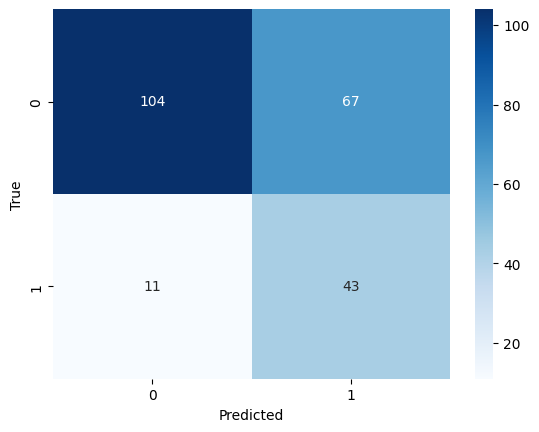

In [69]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
param_grid=[{
    'n_neighbors':range(3,21),
    'algorithm':['ball_tree','kd_tree','brute'],
    'weights':['uniform','distance'],
    'p':[1,2]
}]

In [75]:
knn_Grid=GridSearchCV(KNeighborsClassifier(),param_grid=param_grid,cv=3,verbose=0,n_jobs=-1)

In [76]:
knn_Grid.fit(X_train,y_train)
knn_Grid.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 16, 'p': 2, 'weights': 'uniform'}

In [77]:
knn=KNeighborsClassifier(**knn_Grid.best_params_)

In [78]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=16)

In [79]:
y_pred3=knn.predict(X_test)
score_knn=accuracy_score(y_pred3,y_test)
score_knn

0.7733333333333333

In [80]:
f1_knn=f1_score(y_pred3,y_test)
f1_knn

0.864

In [81]:
cm=metrics.confusion_matrix(y_test,y_pred3)
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           1       0.79      0.95      0.86       171
           2       0.57      0.22      0.32        54

    accuracy                           0.77       225
   macro avg       0.68      0.58      0.59       225
weighted avg       0.74      0.77      0.73       225



Text(50.722222222222214, 0.5, 'True')

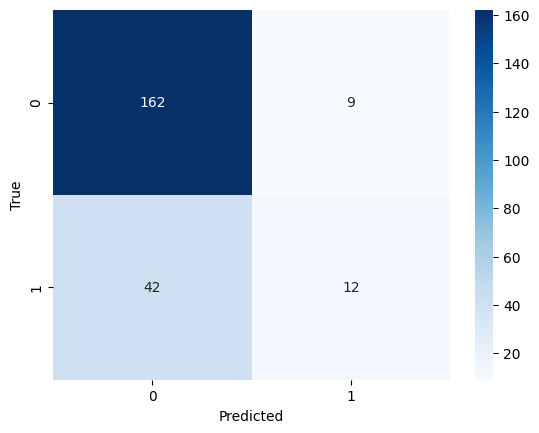

In [82]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

In [83]:
print('Accuracy')
print('Accuracy of RF is',score_rf)
print('Accuracy of Logistic Regession is',score_log)
print('Accuracy of KNN is',score_knn)

Accuracy
Accuracy of RF is 0.7688888888888888
Accuracy of Logistic Regession is 0.6533333333333333
Accuracy of KNN is 0.7733333333333333


In [84]:
print('F-score')
print('F-score of RF is',f1_rf)
print('F-score of Logistic Regession is',f1_log)
print('F-score of KNN is',f1_knn)

F-score
F-score of RF is 0.858695652173913
F-score of Logistic Regession is 0.7272727272727272
F-score of KNN is 0.864
